# Décomposition de Cholesky


\begin{align}
\mathbf{A} = \mathbf{LL}^T & =
\begin{pmatrix}   L_{11} & 0 & 0 \\
   L_{21} & L_{22} & 0 \\
   L_{31} & L_{32} & L_{33}\\
\end{pmatrix}
\begin{pmatrix}   L_{11} & L_{21} & L_{31} \\
   0 & L_{22} & L_{32} \\
   0 & 0 & L_{33}
\end{pmatrix} \\
& =
\begin{pmatrix}   L_{11}^2 &   &(\text{symmetric})   \\
   L_{21}L_{11} & L_{21}^2 + L_{22}^2& \\
   L_{31}L_{11} & L_{31}L_{21}+L_{32}L_{22} & L_{31}^2 + L_{32}^2+L_{33}^2
\end{pmatrix},
\end{align}

Nous obtenons l'expression des éléments $L_{ij}$ avec les expression suivantes :

$$L_{j,j} = \sqrt{ A_{j,j} - \sum_{k=1}^{j-1} L_{j,k}^2 }, $$
$$L_{i,j} = \frac{1}{L_{j,j}} \left( A_{i,j} - \sum_{k=1}^{j-1} L_{i,k} L_{j,k} \right) \quad \text{for } i>j. $$

L'expression sous la racine doit être toujours positive ou nulle

Pour les matrices complexes, on utilise les expressions suivantes :
$$L_{j,j} = \sqrt{ A_{j,j} - \sum_{k=1}^{j-1} L_{j,k}L_{j,k}^* }, $$
$$L_{i,j} = \frac{1}{L_{j,j}} \left( A_{i,j} - \sum_{k=1}^{j-1} L_{i,k} L_{j,k}^* \right) \quad \text{for } i>j. $$

voir [Wikipedia](https://en.wikipedia.org/wiki/Cholesky_decomposition)

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def cholesky(a):
    n = len(a)
    for k in range(n):
        try:
            a[k,k] = math.sqrt(a[k,k] - np.dot(a[k,0:k],a[k,0:k]))
        except ValueError:
            error.err('Matrix is not positive definite')
        for i in range(k+1,n):
            a[i,k] = (a[i,k] - np.dot(a[i,0:k],a[k,0:k]))/a[k,k]
    for k in range(1,n): a[0:k,k] = 0.0
    return a

def choleskySol(L,b):
    n = len(b)
    c = b.copy()
    # Solution of [L]{y} = {b}
    for k in range(n):
        c[k] = (c[k] - np.dot(L[k,0:k],c[0:k]))/L[k,k]
    # Solution of [L_transpose]{x} = {y}
    for k in range(n-1,-1,-1):
        c[k] = (c[k] - np.dot(L[k+1:n,k],c[k+1:n]))/L[k,k]
    return c

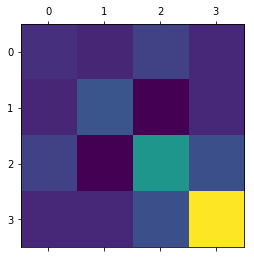

In [8]:
A = np.array( \
             [  \
              [ 1.44,    -0.36,     5.52,       0.0],\
              [-0.36,   10.33,      -7.78,      0.0],\
              [ 5.52,   -7.78,      28.40,      9.0],\
              [ 0.0,    0.0,        9.0,        61.0]\
              ])
# Display matrix
plt.matshow(A)

plt.show()

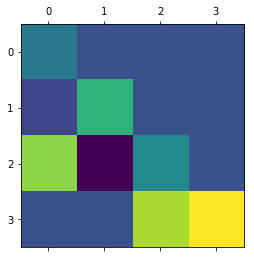

In [9]:
b = np.array([0.04, -2.15, 0.0, 0.88])

aOrig = A.copy()

L = cholesky(A)
x = choleskySol(L,b)

plt.matshow(L)

plt.show()

In [10]:
b_star = np.dot(aOrig,x)

print("Solution Par la méthode de Cholesky \nx =",x)
print('\nVérification : Ax =\n',b_star)
print("\nAx-b=",b_star-b)

Solution Par la méthode de Cholesky 
x = [ 3.09212567 -0.73871706 -0.8475723   0.13947788]

Vérification : Ax =
 [  4.00000000e-02  -2.15000000e+00  -3.55271368e-15   8.80000000e-01]

Ax-b= [  3.46944695e-17   4.44089210e-16  -3.55271368e-15  -9.99200722e-16]
